In [ ]:
# %pip install pandas numpy seaborn matplotlib scikit-learn

In [567]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [568]:
df = pd.read_csv("./Social_Network_Ads.csv").iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
212,59,42000,0
77,22,27000,0
298,45,79000,0
16,47,25000,1
236,40,57000,0


In [569]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size = 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (320, 2), (80,), (320,))

In [570]:
# standardScalar

In [571]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [572]:
scaler.fit(X_train)
scaler.mean_, scaler.var_

(array([3.62500e+01, 6.95375e+04]), array([7.80125000e+01, 1.18034859e+09]))

In [573]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [574]:
# X_train_scaled # is a numpy array

In [575]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # type: ignore
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns) # type: ignore

In [576]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,80.0,80.0
mean,36.2,69537.5
std,8.9,34573.0
min,19.0,18000.0
25%,28.8,46000.0
50%,37.0,64500.0
75%,42.0,84250.0
max,58.0,150000.0


In [577]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,80.0,80.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.5
25%,-0.8,-0.7
50%,0.1,-0.1
75%,0.7,0.4
max,2.5,2.3


In [578]:
# mean is 0, std is 1

Text(0.5, 1.0, 'After Scalling')

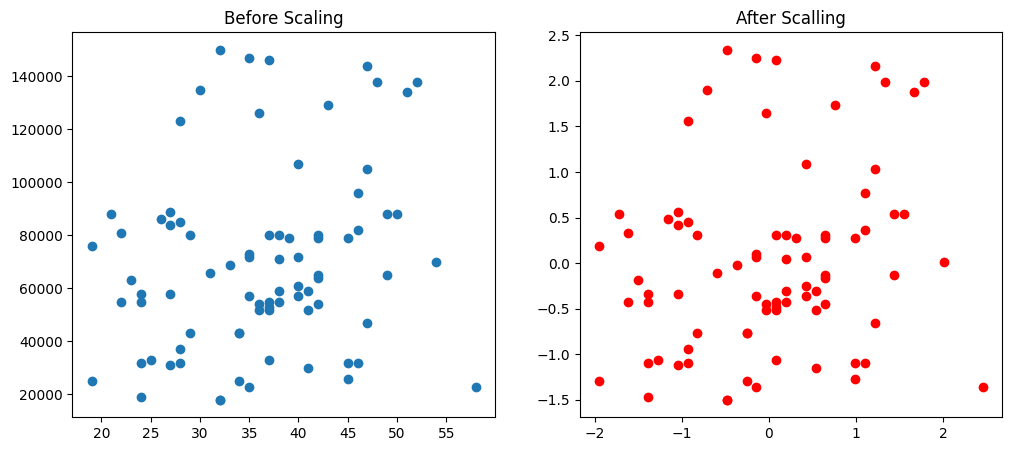

In [579]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scalling")

d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

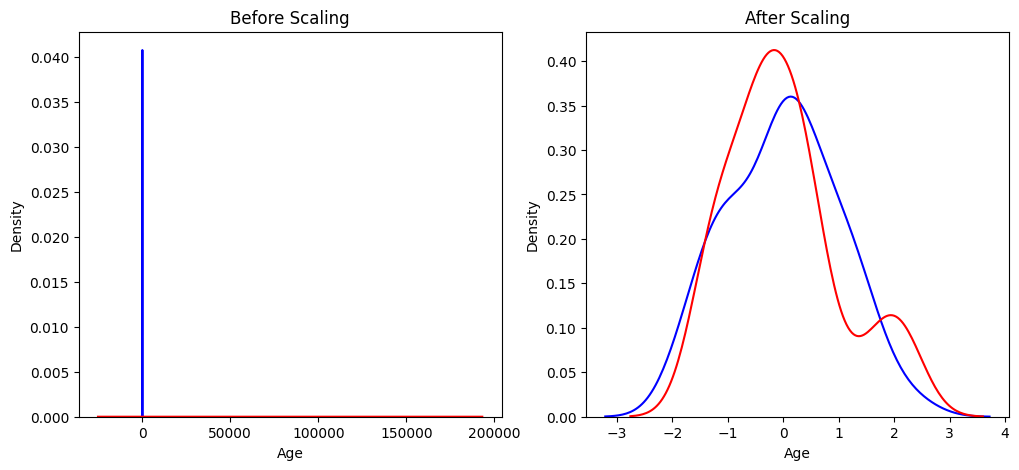

In [580]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1, color="blue")
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color="red")


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color="blue") #type: ignore
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color="red") #type: ignore
# plt.show()


d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

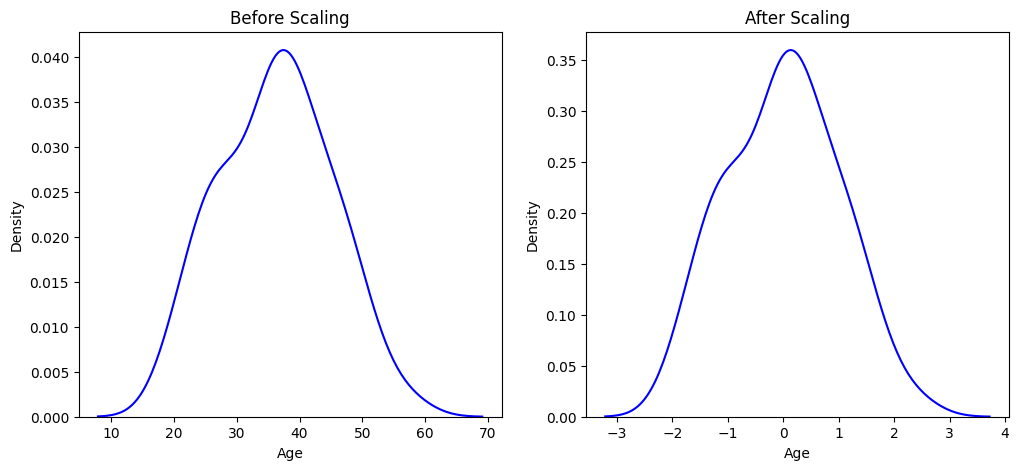

In [581]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1, color="blue")


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color="blue") #type: ignore

d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\InProgress\ML\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

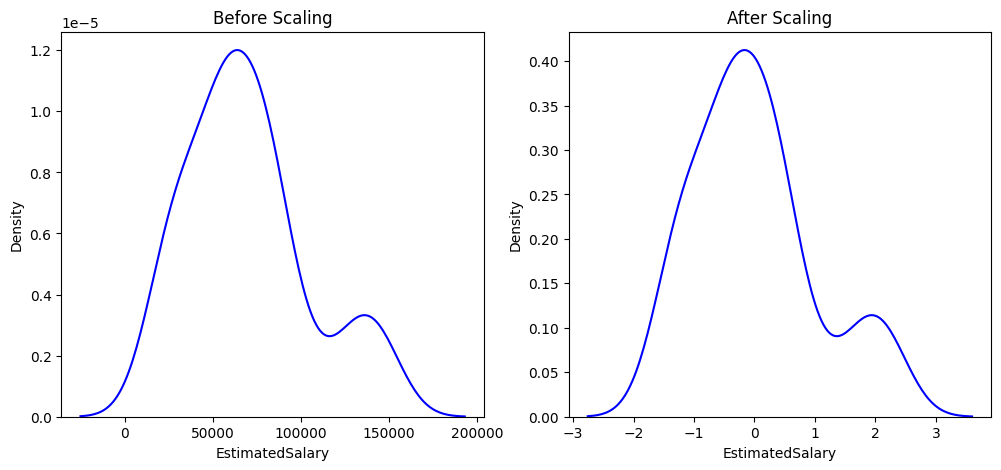

In [582]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color="blue")


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color="blue") #type: ignore

In [583]:
# what happens if not scaled

In [584]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [585]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [586]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [587]:
from sklearn.metrics import accuracy_score

In [588]:
print("Before Scaling: ", accuracy_score(y_test, y_pred))
print("After Scaling: ", accuracy_score(y_test, y_pred_scaled))

Before Scaling:  0.80625
After Scaling:  0.796875


In [ ]:
# The problem of outliers remains the same as only the factor of scale is being applied